<a href="https://colab.research.google.com/github/DDD86/Home_Work-Python-/blob/main/HomeWork_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

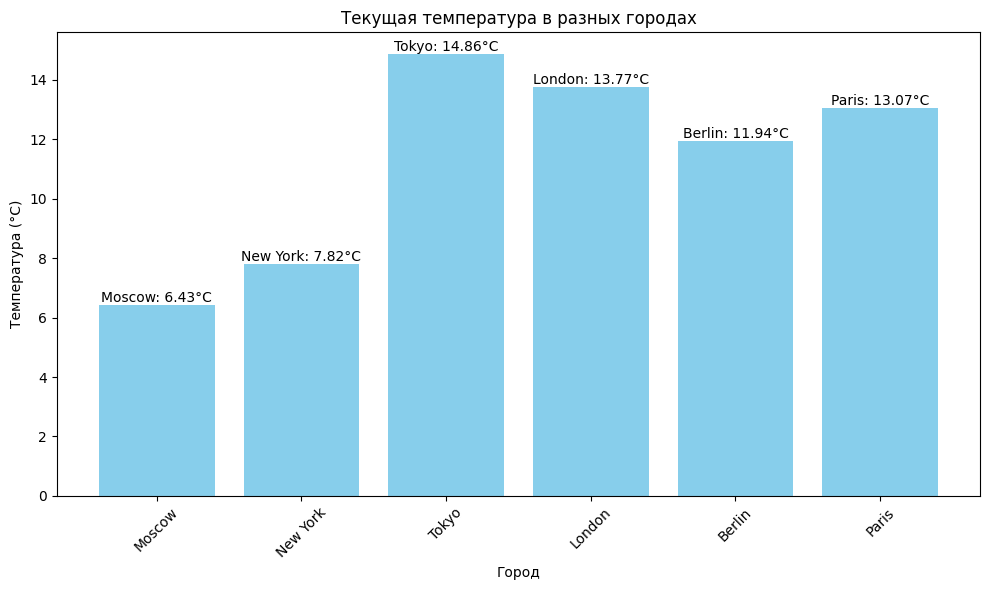

In [54]:
import requests
import matplotlib.pyplot as plt
import numpy as np

cities = ["Moscow", "New York", "Tokyo", "London", "Berlin", "Paris"]
api_key = "b9b6956905ca8e6fe5d8a2fdb23286b8"

temperatures = []
annotations = []

# Iterate through each city and retrieve its weather data
for city in cities:
    # Use the name of the city to obtain its coordinates
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    temperature = data["main"]["temp"]
    temperatures.append(temperature)
    annotations.append(f"{city}: {temperature}°C")

# Create the bar plot with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, temperatures, color='skyblue')
plt.title('Текущая температура в разных городах')
plt.xlabel('Город')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)

for bar, annotation in zip(bars, annotations):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, annotation,
             ha='center', va='bottom')

plt.tight_layout()
plt.show()





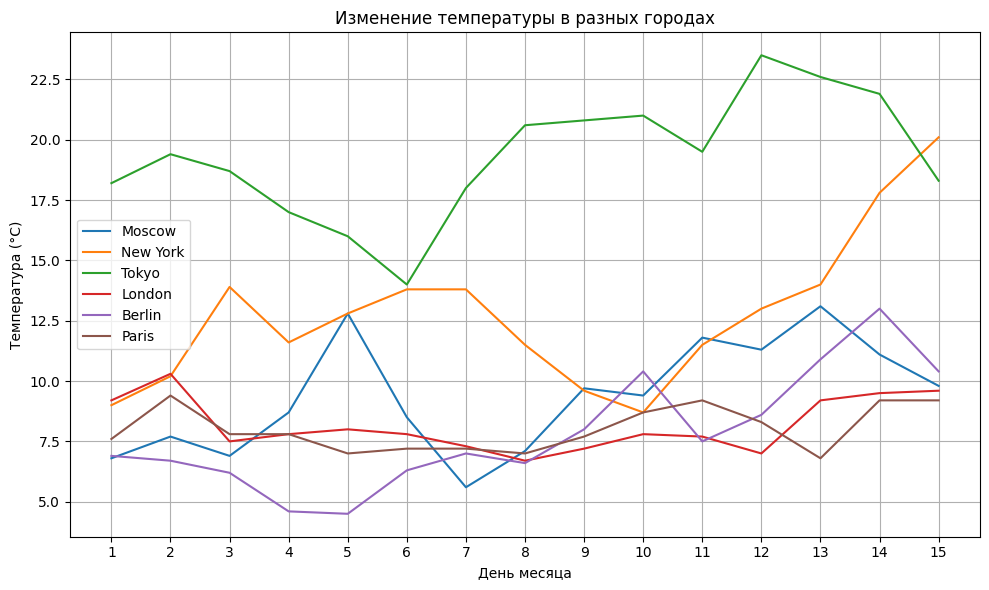

In [55]:
def get_weather_data(city):
    api_key = "YR9U66MT3HY5D6EEMEXKZ4RE8"
    url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{city}?unitGroup=metric&key={api_key}&contentType=json"
    response = requests.get(url)
    data = response.json()
    temperatures = [entry['temp'] for entry in data['days']]
    return temperatures

cities = ["Moscow", "New York", "Tokyo", "London", "Berlin", "Paris"]

weather_data = {}
for city in cities:
    weather_data[city] = get_weather_data(city)

num_days = len(weather_data[cities[0]])

x_values = np.arange(1, num_days + 1)

plt.figure(figsize=(10, 6))
for city, temperatures in weather_data.items():
    plt.plot(x_values, temperatures, label=city)

plt.xlabel('День месяца')
plt.ylabel('Температура (°C)')
plt.title('Изменение температуры в разных городах')
plt.legend()
plt.grid(True)
plt.xticks(x_values)
plt.tight_layout()
plt.show()